# Introduction

This goal of this project is to analyze data from the National Parks Service, particularly surrounding different species observed in various parks.

This project will analyze, clean up data, plot data and seek to explain the findings from the analysis.

Here is a few questions that this project is sought to answer:
* What is the distribution of the conservation statuses of species?
* Are certain types of species more likely to be endangered?
* Which animal is most prevalent? What is their distribution in different parks?

**Data sources:**
<br>
Both dataset `observations.csv` and `species_species.csv` were provided by [Codecademy.com](https://www.codecademy.com).

Note: The data of this project is *inspired* by real data, but is mostly fictional.

## Data

### Input Python Modules
First, import the primary modules that will be used in this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

### Load the data
Load the data as pandas `DataFrames` for ease of latter analysis. Take a look of the data to get a basic idea about what speciesrmation does the dataset contain.

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
obv = pd.read_csv('observations.csv')
obv.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Data Characteristics
Check the dimension of the dataset. The dataset `species_species.csv` has 5824 rows and 4 columns while `observations.csv` has 23296 rows and 3 columns.

In [4]:
print('Species shape:',species.shape)
print('observations shape:', obv.shape)

Species shape: (5824, 4)
observations shape: (23296, 3)


### Explore the Data

#### Species

Explore the `species` data a bit more. Fisrt, find the number of `category`. There are 7 distinguish categories represented in the dataset, including plants and animals.

In [5]:
print('Categories:', species.category.unique())
print('Amount of categories:', species.category.nunique())

Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Amount of categories: 7


Take a look to the `category` column. Vascular Plant is the largest share of species with 4470 while reptile is the fewest share of species with 79.
<br>
Note that `conservation_status` column contains quite a few data comparing to the `scientific_name` and `common_names`. Bird is the largest share of species that has a conservation status with 79 while nonvascular plant and reptile are the fewest share of species that have a conservation status with 5.

In [6]:
species.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,80,80,7
Bird,521,521,79
Fish,127,127,11
Mammal,214,214,38
Nonvascular Plant,333,333,5
Reptile,79,79,5
Vascular Plant,4470,4470,46


Here, in respect of `conservation_status`, there are 5633 `NaN` values. It means those species are not under any conservation status. Besides, there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

In [7]:
print('Amount of na values:', species.conservation_status.isna().sum())
species_cs=species.category.groupby(species['conservation_status']).count().reset_index()
species_cs.head()

Amount of na values: 5633


,conservation_status,category
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


#### Observations

Next, explore deeper to the `observations.csv`. There are 4 national parks in the dataset `obv`. Each park has equal size of observations with 5824, which comes up a total of 3314739 observations.

In [8]:
print('Parks:', obv.park_name.unique())
print('Number of Parks:', obv.park_name.nunique())

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of Parks: 4


In [9]:
print('Observations under each national park:')
print(obv.observations.groupby(obv['park_name']).count())
print('The total amount of observation is', obv.observations.sum())

Observations under each national park:
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
Name: observations, dtype: int64
The total amount of observation is 3314739


## Analysis

This section will begin to analyze the data. First, clean up and explore the column data `conservation_status` in `species`.

There are many `NaN` values in the `conservation_status` column. Prior to analyze, those `NaN` values will be converted to `No Status`. There are 5633 species with `No Status` value.

In [10]:
species.fillna('No Status', inplace=True)
print(species.groupby('conservation_status').size())

print('Sum of species with no conservation status:', \
      species[species['conservation_status'] == 'No Status'] \
      ['conservation_status'].count())

print('Sum of species with conservation status:', \
      species[species['conservation_status'] != 'No Status'] \
      ['conservation_status'].count())

conservation_status
Endangered              16
In Recovery              4
No Status             5633
Species of Concern     161
Threatened              10
dtype: int64
Sum of species with no conservation status: 5633
Sum of species with conservation status: 191


Next, extract the species nested in the `conservation_status`. The status of `Endangered` has 7 mammals and 4 birds while the status of `In Recovery` has 1 mammal and 3 birds. This could possibly mean that the birds are bouncing back more than the mammals. 

In [11]:
cc=species[species.conservation_status!='No Status']\
            .groupby(['conservation_status', 'category'])\
            ['scientific_name']\
            .count().unstack()
cc

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<AxesSubplot:title={'center':'Amount of Share Species in Conservation Status'}, xlabel='Conservation Status', ylabel='Number of Species'>

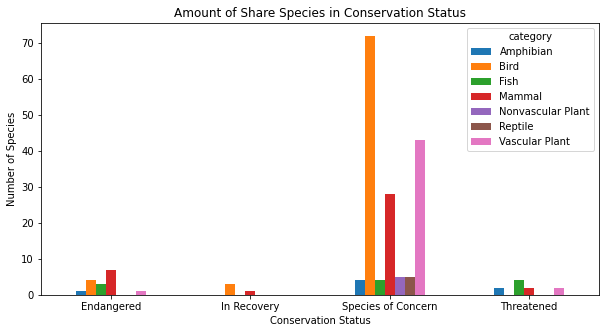

In [12]:
cc.plot(kind='bar', figsize=(10,5), \
        title='Amount of Share Species in Conservation Status',\
        xlabel='Conservation Status', ylabel='Number of Species',\
        rot=0)

The next question is whether certain types of species are more likely to be endangered. To answer this question, a column `is_protected` is created, which contains all `conservation_status` values except for those with `No Status`.

In [13]:
species['is_protected']=species.conservation_status!='No Status'

Groupby the column of `category` and `is_protected` to show the breakdown of each species type and protection status.

The table below exhibits that bird, mammal, and vascular plant have a relatively large number of species protected.

In [14]:
cat_count=species.groupby(['category', 'is_protected'])\
                ['scientific_name'].nunique().unstack()
cat_count.rename(columns={False:'not_protected', \
                          True:'protected'}, inplace=True)
cat_count

is_protected,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


Calculate the protection rate per `category`, the data exhibits that bird has ~15% under protection and ~17% of mammals.

In [15]:
cat_count['percent_protected']=round(cat_count['protected']/ \
            (cat_count['not_protected']+cat_count['protected'])*100, 2)
cat_count

is_protected,not_protected,protected,percent_protected
category,,,
Amphibian,72,7,8.86
Bird,413,75,15.37
Fish,115,11,8.73
Mammal,146,30,17.05
Nonvascular Plant,328,5,1.50
Reptile,73,5,6.41
Vascular Plant,4216,46,1.08


#### Species in Parks
The next section will analyzes the dataset `observations.csv` which holds recorded sightings of various species in several national parks for 7 days.

To find out which animal is most prevalent across the observed national parks, it would be a great start by looking for common name from `species`. The data will be split into individual names.

In [16]:
# Define a function to remove punctuation between each value

def remove_punctuation(text):
    for punc in string.punctuation:
        text = text.replace(punc, '')
    return text

# After removing the punctuation, split the words by each whitespace
# Then, make a list from the output

commonNames=species[species.category=='Mammal']['common_names']\
    .apply(remove_punctuation).str.split(' ').to_list()

commonNames[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Remove the duplicate names to ensure that each name will only count once.

In [17]:
# Use set() with for-loop to remove the duplicates

clean_list = list()

for original_list in commonNames:
    original_list = sorted(list(set(original_list)))
    clean_list.append(original_list)

clean_list[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Cattle', 'Domestic', 'Domesticated', 'Feral'],
 ['Domestic', 'Feral', 'Mouflon', 'Red', 'Sheep'],
 ['Elk', 'Or', 'Wapiti']]

Combine the inner lists into one list for easier use.

In [18]:
one_list=[]

[one_list.extend(element) for element in clean_list]
one_list[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

Now, the list is ready for counting the number of times that a name appears. Then, sort the counts by descending order. In this analysis, it seems that `Bat` appears 23 times and `Shrew` appears 18 times.

In [19]:
count_list = []

for name in one_list:
    x = (name, one_list.count(name))
    count_list.append(x)

pd.DataFrame(set(count_list), columns = ['Names', 'Count'])\
        .sort_values('Count', ascending = False)

,Names,Count
155,Bat,23
32,Shrew,18
168,Myotis,17
184,Mouse,16
190,Chipmunk,13
...,...,...
44,Antelope,1
112,LongLegged,1
108,Fringed,1
107,Heather,1


There are multiple `scientific_name` in the dataset that contains the different types of bats. The next task is to find out which rows of `species` corresponds to the bats. 
<Br>
Create a new column `is_bat` to facilitate the process of find the corresponding bats.

In [20]:
species['is_bat'] = species['common_names']\
    .str.contains(r'\bbat\b', case = False, regex = True)

Here is a subet of `species` where `is_bat` is True.

In [21]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Status,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Status,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Status,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Status,False,True


Merge the column `is_bat` to `obv`. Then, one can easily find the species of bats across four national parks.

In [22]:
bat_obv = obv.merge(species[species.is_bat])
bat_obv.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Status,False,True


Here is a break down of observations by national parks. Yellowstong National Park has the largest observations with 8362 while Great Smoky Mountains National Park has the fewest observations with 2411.

In [23]:
bat_obv.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now, let's take a look to the break down of bats in aspect of `is_protected` for each national park. It seems that all the national parks except Great Smoky Mountains National Park has more bats under protection than not.

In [24]:
bat_by_park=bat_obv.groupby(['park_name', 'is_protected'])\
            ['observations'].sum().reset_index()
bat_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


The plots below exhibit the distribution of bats in the span of a week. Plot on the top shows the total observations of bats in a park. One can see that Yellowstone National Park has more bats compare to the other three parks.
<Br>
The plot at the bottom shows the observations of bats in aspect of their protection status in a week. It seems that Yellowstone National Park has more sightings of protected bats than non-protected bats. In contrast, Great Smoky Mountains National Park has more non-protected species of bats.

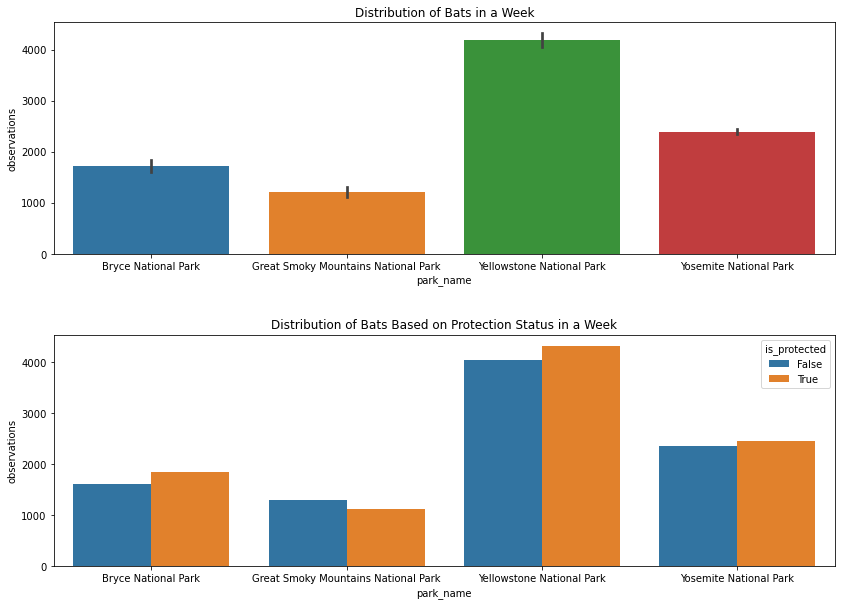

In [25]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.barplot(x='park_name', y='observations', data=bat_by_park)
plt.title('Distribution of Bats in a Week')

plt.subplot(2,1,2)
sns.barplot(x='park_name', y='observations', hue='is_protected', data=bat_by_park)
plt.title('Distribution of Bats Based on Protection Status in a Week', y=1)

plt.subplots_adjust(hspace=0.35)
plt.show()

## Conclusion

This project produces several data visualization and inferences about various share species in four of the national parks included in the dataset.

The project was able to answer some questions posted in the beginning:
* What is the distribution of the conservation statuses of species?
    * The majority of species were not part of the conservation (5633 vs. 191).
* Are certain types of species more likely to be endangered?
    * Mammals and birds have the highest percentage of protection. Birds may have a better recovery rate than mammals.
* Which animal is most prevalent? What is their distribution in different parks?
    * In this study, it seems that bat is the most prevalent animal. Yellowstone National Park has the most bats population across the four national parks included in the dataset.